In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [5]:
df = pd.read_csv("/content/train.csv")

## Рассмотрим датасет по ближе

In [18]:
df.head(3)

,id,name,groups,len name,пиво,хлеб,вода,сигареты,молоко,3.2%,макароны,фрукт
0,2442477,БЗМЖ Молоко ультропаст.Вкуснотеево900гр.3.2%ПЭТ/б,3,49,False,False,False,False,True,True,False,False
1,1564599,"15.6"" Ноутбук Acer Nitro 5 (AN515-54-58LL)(FHD...",10,100,False,False,False,False,False,False,False,False
2,841848,ЖЕВ.РЕЗИНКА ОРБИТ НЕЖНАЯ МЯТА XX 46153708,10,41,False,False,False,False,False,False,False,False


In [7]:
df.shape

(702723, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702723 entries, 0 to 702722
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      702723 non-null  int64 
 1   name    702723 non-null  object
 2   groups  702723 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 16.1+ MB


Добавим пару новых столбцов

In [9]:
df["len name"] = df["name"].str.len()

Узнаем встречается ли название категории в строке

In [17]:
categories = ["хлеб", "пиво", "вода", "сигареты", "молоко", "3.2%", "макароны", "фрукт"]

for category in categories:
  df[category] = df["name"].map(lambda x: category in x.lower()) 

In [19]:
df.head(3)

,id,name,groups,len name,пиво,хлеб,вода,сигареты,молоко,3.2%,макароны,фрукт
0,2442477,БЗМЖ Молоко ультропаст.Вкуснотеево900гр.3.2%ПЭТ/б,3,49,False,False,False,False,True,True,False,False
1,1564599,"15.6"" Ноутбук Acer Nitro 5 (AN515-54-58LL)(FHD...",10,100,False,False,False,False,False,False,False,False
2,841848,ЖЕВ.РЕЗИНКА ОРБИТ НЕЖНАЯ МЯТА XX 46153708,10,41,False,False,False,False,False,False,False,False


Пострим на распределение данных

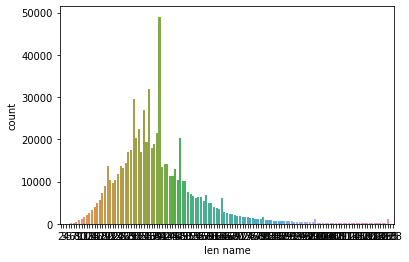

In [20]:
sns.countplot(x = "len name" , data  = df)  

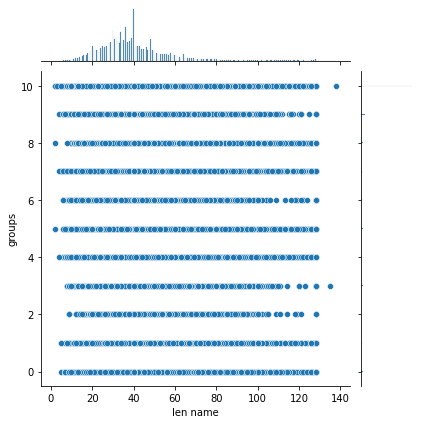

In [21]:
sns.jointplot(x = 'len name', y = "groups" , data = df)

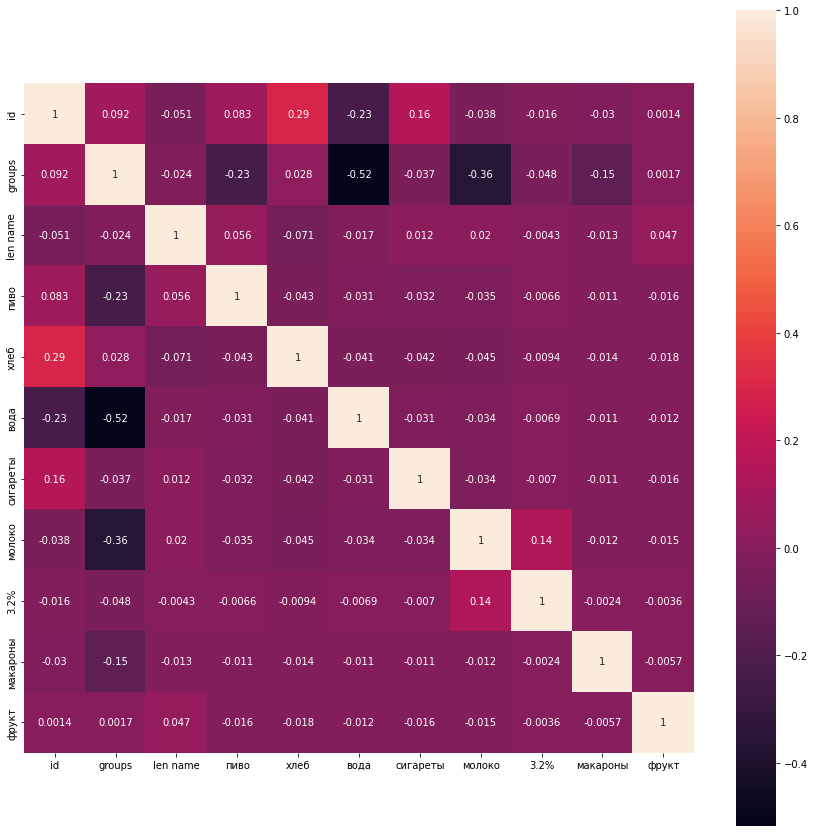

In [22]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [23]:
X = df.drop(["id",	"name","groups"], axis = 1)
y = df[["groups"]]

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702723 entries, 0 to 702722
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   len name  702723 non-null  int64
 1   пиво      702723 non-null  bool 
 2   хлеб      702723 non-null  bool 
 3   вода      702723 non-null  bool 
 4   сигареты  702723 non-null  bool 
 5   молоко    702723 non-null  bool 
 6   3.2%      702723 non-null  bool 
 7   макароны  702723 non-null  bool 
 8   фрукт     702723 non-null  bool 
dtypes: bool(8), int64(1)
memory usage: 10.7 MB


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [26]:
clf = RandomForestClassifier(random_state=0)

In [27]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=0)

## Оценка точности

In [28]:
pred = clf.predict(X_test)

In [29]:
y_test

,groups
283354,10
418237,10
513764,10
629870,10
568968,10
...,...
316255,9
645117,10
188999,4
459464,10


In [32]:
from sklearn.metrics import recall_score

score = recall_score(y_test["groups"], pred, average='macro')
print("Recall score:", score)

Recall score: 0.5240240743831985
